In [19]:
!pip install tqdm

     ---------------------------------------- 77.1/77.1 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import pandas as pd

Read data

In [10]:
columns = ['margin', 'quantity', 'revenue', 'cost', 'profit']
names = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь', 'Декабрь']
df = pd.DataFrame()
for i in range(0, 5):
    for j in range(0, 12):
        if i == 0:
            df_current = pd.read_excel(f'data/20{18+i}/Магазин{18+i}{names[j]}.xlsx')
        else:
            df_current = pd.read_excel(f'data/20{18+i}/Магазин{names[j]}{18+i}.xlsx')
            
        index_mapping = dict(zip(df_current.iloc[-1][-5:].index.values, columns))
        s_current = df_current.iloc[-1][-5:].rename(index_mapping)
        # s_current.name = pd.Timestamp(f'20{18 + i}-{1 + j}-15')
        if df.empty:
            s_current.name = pd.Timestamp(f'20{18 + i}-{1 + j}-15')
            df = s_current.to_frame().T
        else:
            df.loc[pd.Timestamp(f'20{18 + i}-{1 + j}-15')] = s_current
            
        

In [11]:
df

,margin,quantity,revenue,cost,profit
2018-01-15,29.09,"9 463,585",665454.04,515480.48,149973.56
2018-02-15,30.61,"7 447,46",709242.51,543018.51,166224
2018-03-15,28.17,"11 588,288",873493.1,681484.98,192008.12
2018-04-15,30.67,"17 873,575",1288042.19,985738.34,302303.85
2018-05-15,30.18,"15 643,513",1479776.85,1136727.66,343049.19
2018-06-15,28.87,"23 686,65",2227383.3,1728400.68,498982.62
2018-07-15,29.14,"25 251,023",2829993.07,2191363.09,638629.98
2018-08-15,25.79,"25 850,829",2908545.54,2312254.88,596290.66
2018-09-15,27.62,"20 226,968",2014803.24,1578702.8,436100.44
2018-10-15,25.54,"18 162,624",1666158.3,1327160.72,338997.58


In [12]:
df.shape

(60, 5)

Объем продаж (он же выручка или revenue)

In [13]:
revenue = df.revenue
revenue.head()

2018-01-15     665454.04
2018-02-15     709242.51
2018-03-15      873493.1
2018-04-15    1288042.19
2018-05-15    1479776.85
Name: revenue, dtype: object

<AxesSubplot: title={'center': 'Объем продаж'}, ylabel='Выручка, руб'>

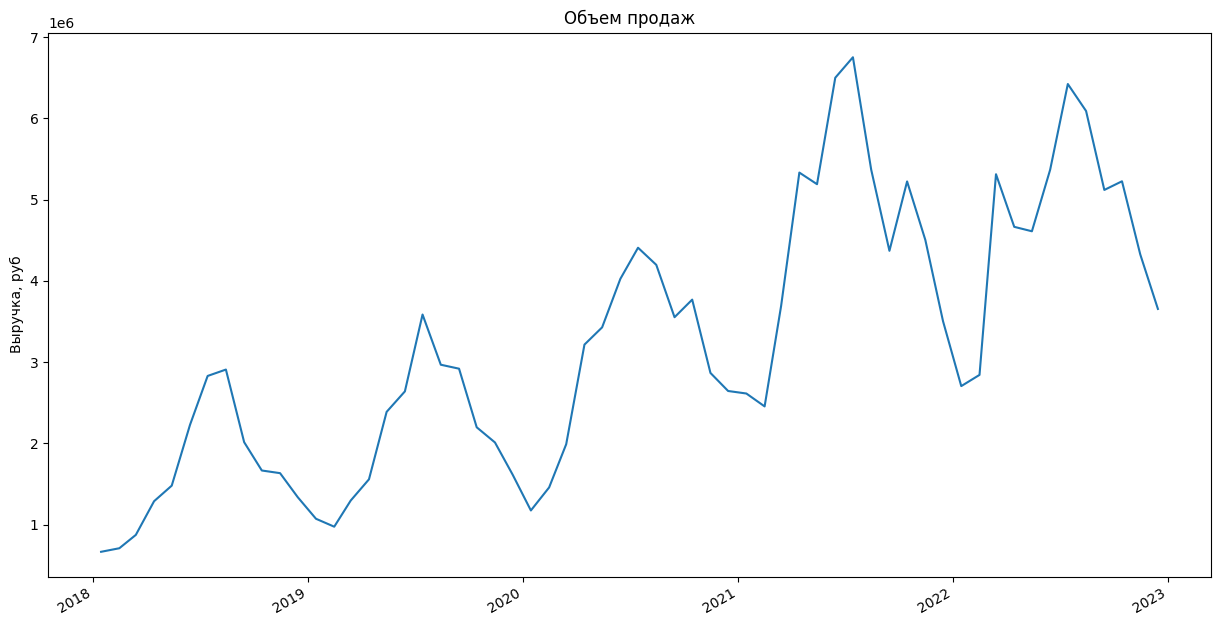

In [14]:
revenue.plot(title='Объем продаж', ylabel='Выручка, руб', figsize=(15,8))

Коэффициент вариации

In [15]:
revenue = revenue.astype(float)
stats = revenue.describe()
stats

count    6.000000e+01
mean     3.224097e+06
std      1.630915e+06
min      6.654540e+05
25%      1.908906e+06
50%      2.913920e+06
75%      4.431975e+06
max      6.752610e+06
Name: revenue, dtype: float64

In [16]:
v = stats['std'] / stats['mean']
round(v, 2)

0.51

Скользящее среднее

In [17]:
#revenue.rolling(24).last()
round(revenue[-24:].mean())

4660615

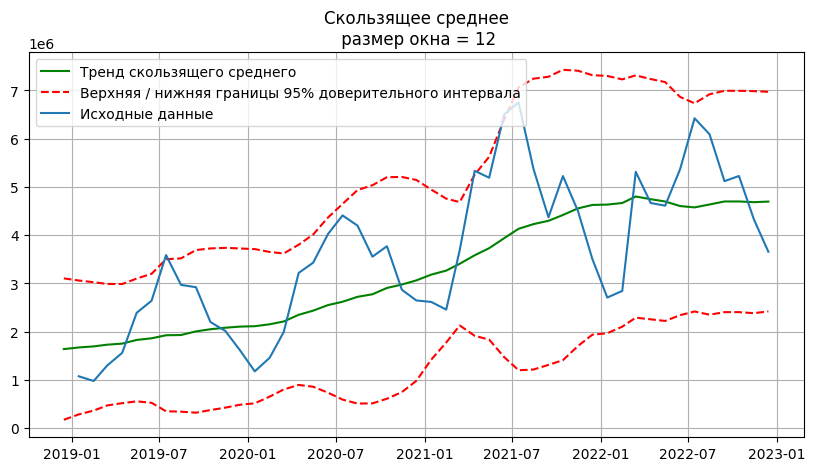

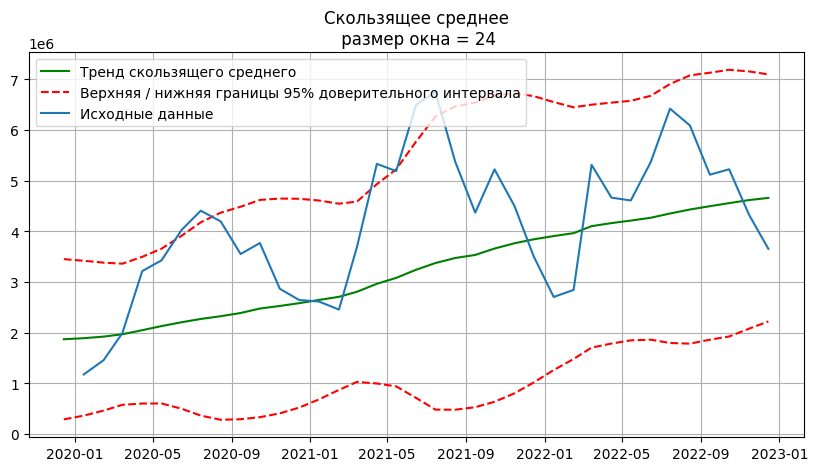

In [20]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
def plotMovingAverage(series, n):

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(10,5))
    plt.title("Скользящее среднее\n размер окна = {}".format(n))
    plt.plot(rolling_mean, "g", label="Тренд скользящего среднего")

    plt.plot(upper_bond, "r--", label="Верхняя / нижняя границы 95% доверительного интервала")
    plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Исходные данные")
    plt.legend(loc="upper left")
    plt.grid(True)
plotMovingAverage(revenue, 12)
plotMovingAverage(revenue, 24)

Экспоненциальное сглаживание

In [21]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


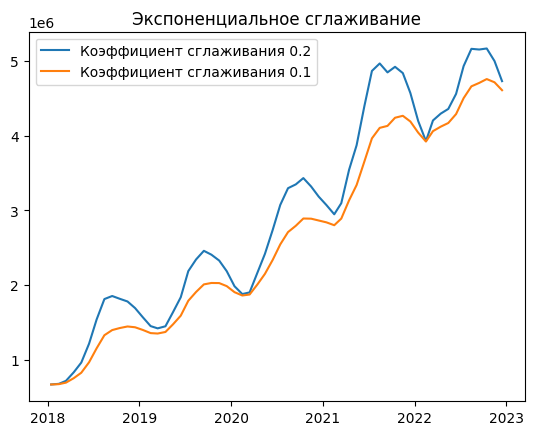

In [40]:
for alpha in [0.2, 0.1]:
    plt.plot(revenue.index.values, exponential_smoothing(revenue, alpha), label="Коэффициент сглаживания {}".format(alpha))
plt.title("Экспоненциальное сглаживание")
plt.legend()

Двойное экспоненциальное сглаживание

In [41]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [58]:
x_series

Text(0.5, 1.0, 'Двойное экспоненциальное сглаживание')

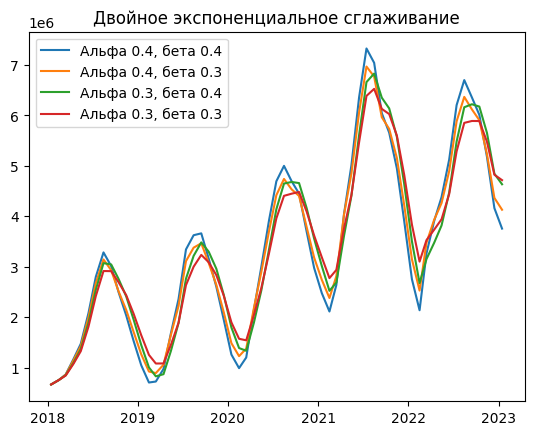

In [61]:
# add one more date to the date index
x_series = list(revenue.index.values)
x_series.append(np.datetime64('2023-01-15'))

for alpha in [0.4, 0.3]:
    for beta in [0.4, 0.3]:
        plt.plot(x_series, double_exponential_smoothing(revenue, alpha, beta), label="Альфа {}, бета {}".format(alpha, beta))
        
plt.legend()
plt.title('Двойное экспоненциальное сглаживание')

In [ ]:
Критерий Дики-Фуллера

Критерий Дики-Фуллера: p=0.838792


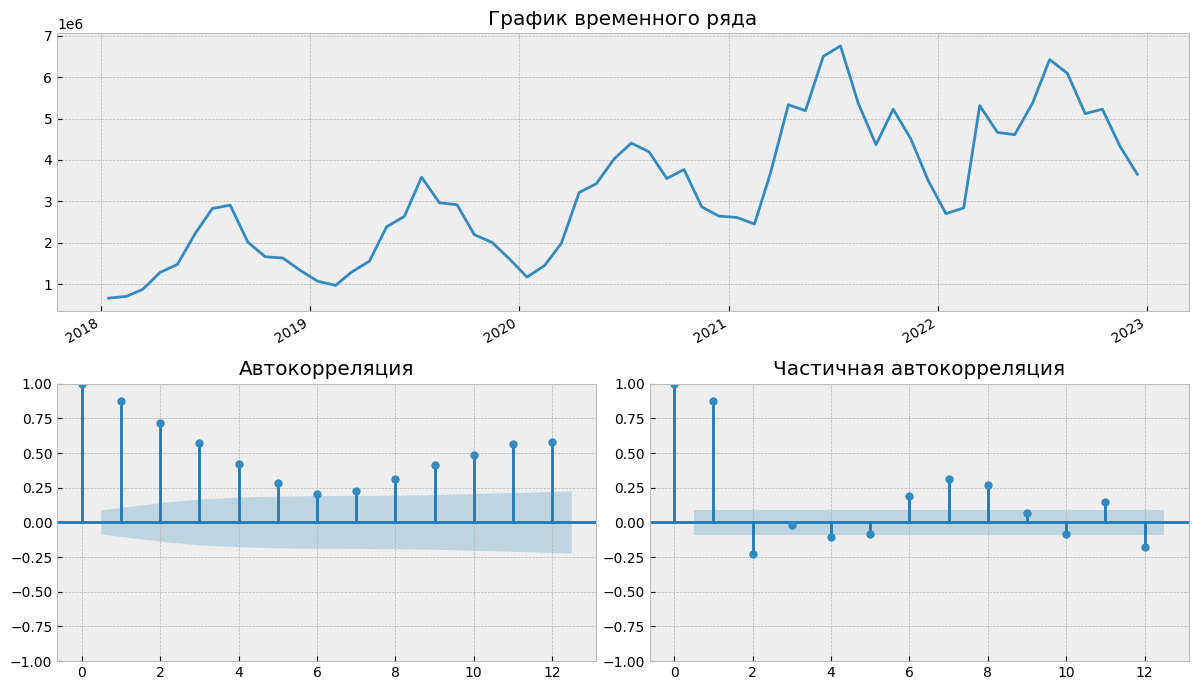

In [65]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('График временного ряда')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5, title='Автокорреляция')
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5, title='Частичная автокорреляция')

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(revenue, lags=12)

Критерий Дики-Фуллера: p=0.838792
Оптимальный параметр преобразования Бокса-Кокса: 0.489983


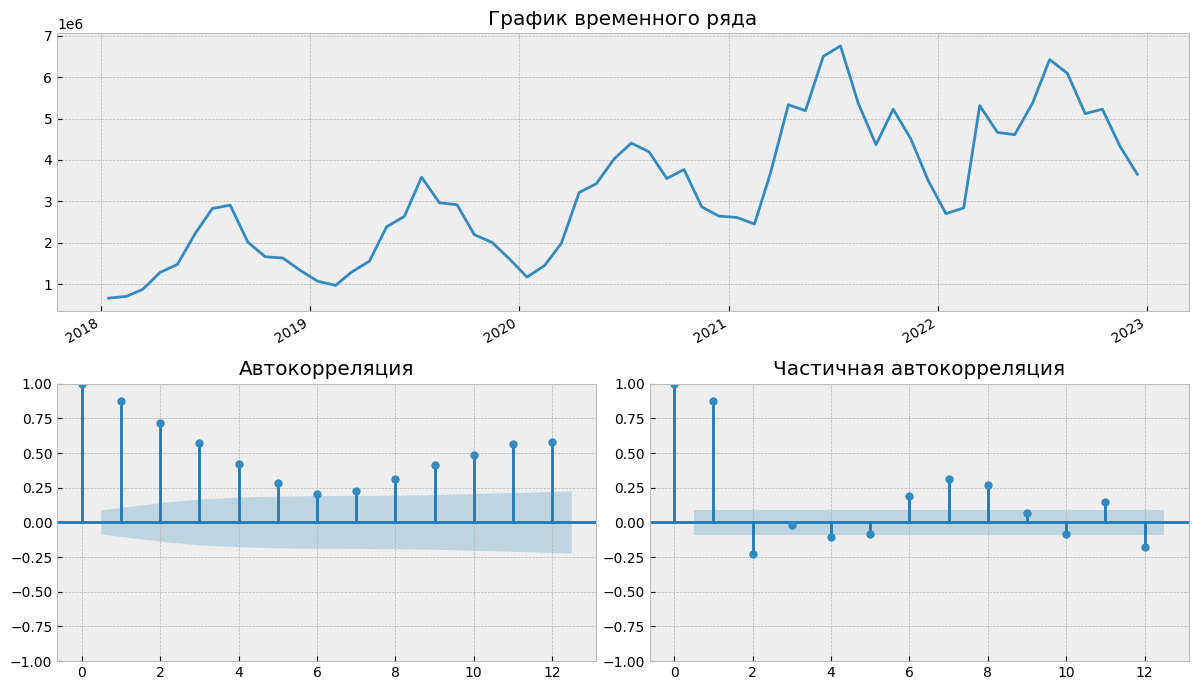

In [66]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

data = revenue.copy()
data['Users_box'], lmbda = scs.boxcox(revenue) # прибавляем единицу, так как в исходном ряде есть нули
tsplot(revenue, lags=12)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

Критерий Дики-Фуллера: p=0.020185


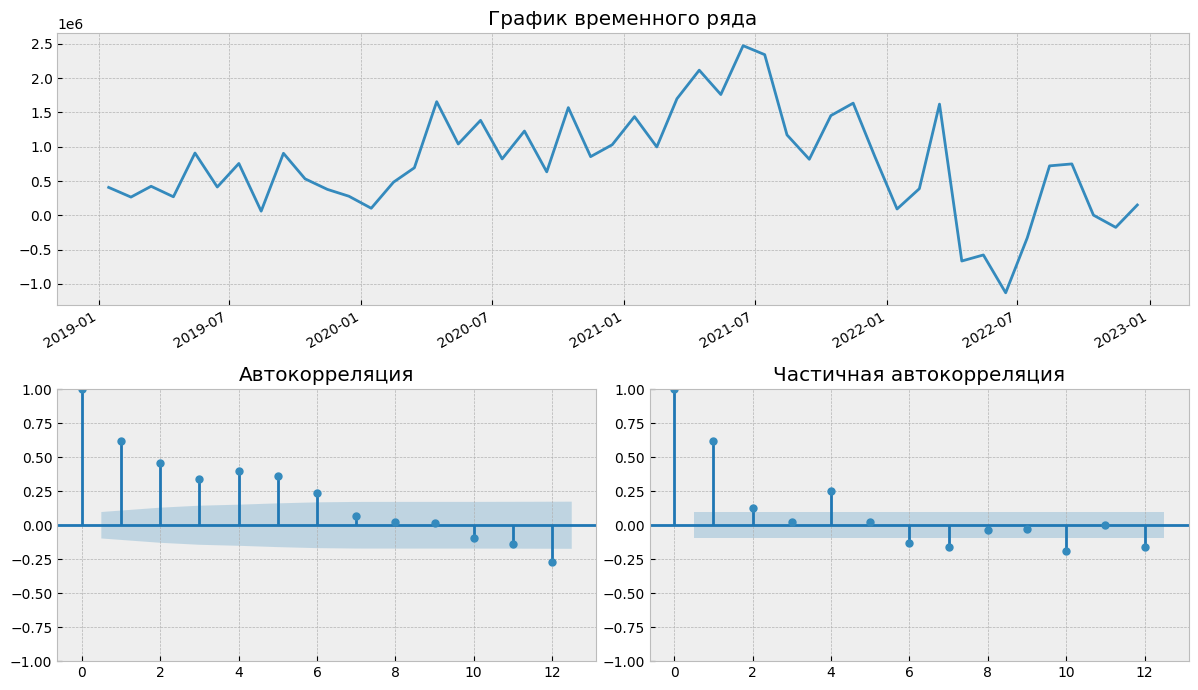

In [67]:
data['Users_box_season1'] = revenue - revenue.shift(12)
tsplot(data.Users_box_season1[12:], lags=12)

Критерий Дики-Фуллера: p=0.000000


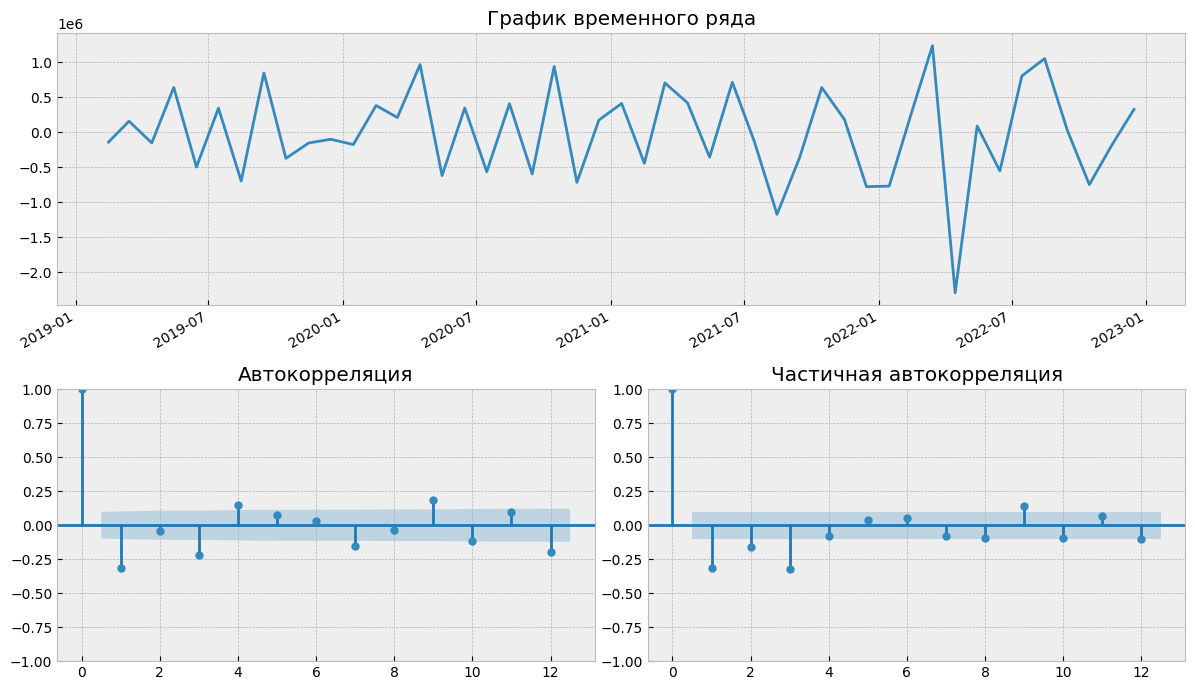

In [68]:
data['Users_box_season_diff'] = data.Users_box_season1 - data.Users_box_season1.shift(1)
tsplot(data.Users_box_season_diff[12+1:], lags=12)

In [69]:
ps = range(0, 5)
d=1
qs = range(0, 4)
Ps = range(0, 5)
D=1
Qs = range(0, 1)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [199]:
parameters_list[1]

(0, 0, 1, 0)

In [70]:
model=sm.tsa.statespace.SARIMAX(data.Users_box, order=(0, d, 0), 
                                seasonal_order=(1, D, 0, 12)).fit(disp=-1)

In [71]:
%%time
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.Users_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:43<00:00,  1.03s/it]

      parameters         aic
7   (0, 1, 2, 0)  657.949484
6   (0, 1, 1, 0)  658.231002
62  (3, 0, 2, 0)  658.652563
12  (0, 2, 2, 0)  658.696122
27  (1, 1, 2, 0)  658.787381
CPU times: total: 14.1 s
Wall time: 1min 43s


In [113]:
help(best_model.summary)

Help on method summary in module statsmodels.tsa.statespace.sarimax:

summary(alpha=0.05, start=None) method of statsmodels.tsa.statespace.sarimax.SARIMAXResults instance
    Summarize the Model
    
    Parameters
    ----------
    alpha : float, optional
        Significance level for the confidence intervals. Default is 0.05.
    start : int, optional
        Integer of the start observation. Default is 0.
    model_name : str
        The name of the model used. Default is to use model class name.
    
    Returns
    -------
    summary : Summary instance
        This holds the summary table and text, which can be printed or
        converted to various output formats.
    
    See Also
    --------
    statsmodels.iolib.summary.Summary



In [112]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -324.975
Date:                             Sun, 07 May 2023   AIC                            657.949
Time:                                     20:15:23   BIC                            665.350
Sample:                                          0   HQIC                           660.734
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5835      0.121     -4.833      0.000      -0.820      -0.347
ar.S.L12      -0.3795      0.172     -2.211      0.027      -0.716      -0.043
ar.S.L24      -0.3005      0.151     -1.993      0.046      -0.596      -0.005
sigma2      5.537e+04   1.24e+04      4.448      0.000     3.1e+04    7.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.55   Prob(JB):                         0.88
Heteroskedasticity (H):               1.88   Skew:                             0.13
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
%%time
best_model = sm.tsa.statespace.SARIMAX(data.Users_box, order=(0, d, 1), 
                                        seasonal_order=(2, D, 0, 12)).fit(disp=-1)
print(best_model.summary()

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -324.975
Date:                             Sun, 07 May 2023   AIC                            657.949
Time:                                     19:55:39   BIC                            665.350
Sample:                                          0   HQIC                           660.734
                                              - 60                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5835      0.121     -4.833      0.000      -0.820      -0.347
ar.S.L12      -0.3795      

Критерий Дики-Фуллера: p=0.000386


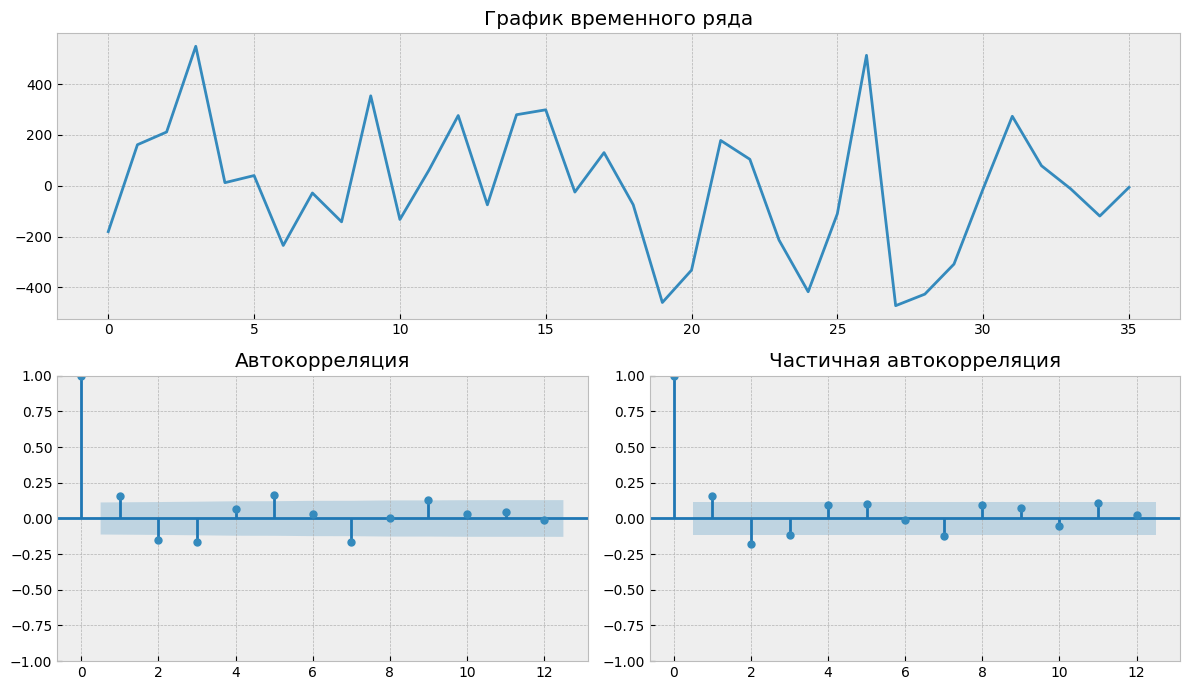

In [74]:
#tsplot(best_model.resid[24:], lags=12)
tsplot(best_model.resid[24:], lags=12)

In [75]:
forecast_length = 24 # 2 years

In [102]:
forecast_extra_length = len(forecast) - len(revenue.index.values) - 1
# create a timedelta of 2 years
delta = np.timedelta64(5, 'Y')
x_forecast_series = np.append(revenue.index.values,
                              revenue.index.values[:forecast_extra_length] + delta.astype('timedelta64[ns]'))

In [103]:
len(x_forecast_series)

84

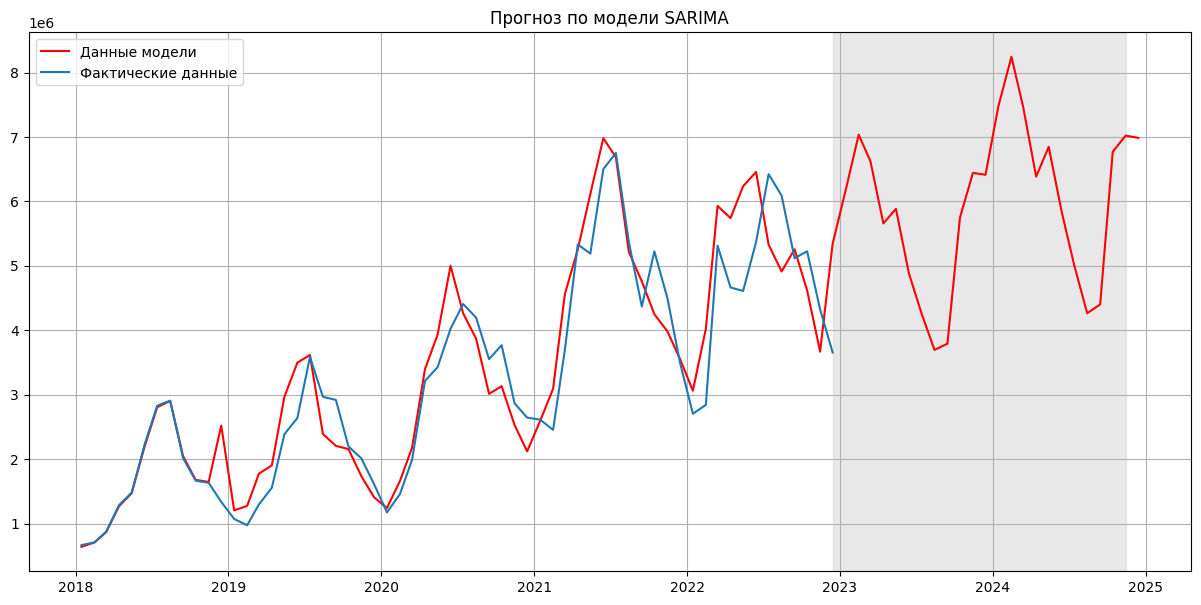

In [108]:
data["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)
forecast = invboxcox(best_model.predict(start = data.shape[0], end = data.shape[0]+forecast_length), lmbda)
forecast = np.append(data.arima_model, forecast)
#actual = data.Users_box
actual = revenue.values

plt.figure(figsize=(15, 7))
plt.plot(x_forecast_series, forecast[1:], color='r', label="Данные модели")
#plt.title("SARIMA model\n Mean absolute error {} users".format(round(mean_absolute_error(data.dropna().Users_box, data.dropna().arima_model))))
plt.title("Прогноз по модели SARIMA")
plt.plot(revenue.index.values, actual, label="Фактические данные")
plt.legend()
plt.axvspan(revenue.index.values[-1], x_forecast_series[-2], alpha=0.5, color='lightgrey')
plt.grid(True)